In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
square_left = 0
square_right = 2
domain = square_right - square_left

In [15]:
def square_wave(x):
    if x > 0.5 and x < 1.5:
        return 1
    else:
        return 0

def sample(n):
    samples = []
    for i in range(n):
        x = np.random.uniform(square_left,square_right)
        y = square_wave(x)
        samples.append([x,y])
    return samples

In [11]:
class value:
    def __init__(self, width, alpha = 0.2, features = 50):
        self.width = width
        self.features = features
        self.weights = np.zeros(features)
        self.step = (domain - width)/(features - 1)
        self.alpha = alpha
        
    def get_value(self, x):
        featuresToUse = []
        for i in range(self.features):
            if x >= square_left + i*self.step and x < square_left + i*self.step + self.width:
                featuresToUse.append(i)
        return np.sum(self.weights[featuresToUse])
    
    def update_value(self, delta, x):
        featuresToUse = []
        for i in range(self.features):
            if x >= square_left + i*self.step and x < square_left + i*self.step + self.width:
                featuresToUse.append(i)
        delta *= self.alpha / len(featuresToUse)
        for i in featuresToUse:
            self.weights[i] += delta

In [12]:
def update(samples, vf):
    for x, y  in samples:
        delta = y - vf.get_value(x)
        vf.update_value(delta, x)


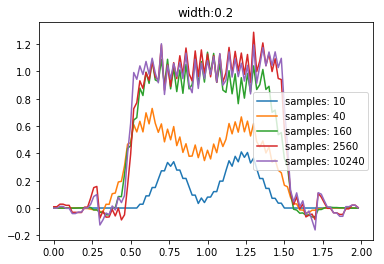

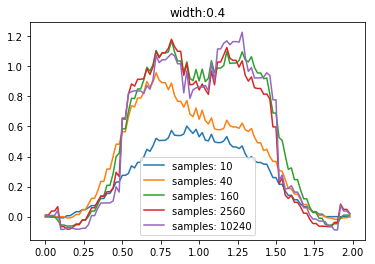

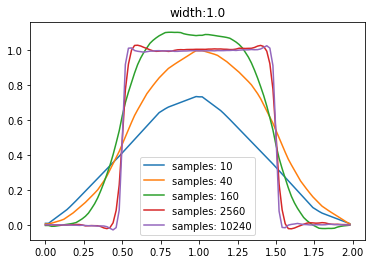

In [19]:
width_list = [0.2, 0.4, 1.0]
sample_list = [10, 40, 160, 2560, 10240]
x_list = np.arange(square_left, square_right, 0.02)

for j in width_list:
    for i in sample_list:
        plt.figure(j)
        plt.title('width:'+ str(j))
        samples = sample(i)
        vf = value(j)
        update(samples, vf)
        values = [vf.get_value(x) for x in x_list]
        plt.plot(x_list, values, label='samples: ' + str(i))
        plt.legend()
    plt.show()
            

In [23]:
vf.get_value(1.75)


-0.0011160746050558655